In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk

#parameters for Galaxy NGC 5907
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
h = 5.7                                             #radial scale-length (kpc)
z0 = 0.83                                           #half-thickness (kpc)
R = 19.3                                            #cut-off radius (kpc)
d = 0.99                                            #cut-off length upper limits(kpc)

#rho = 10                                            #madeup parameter until we figure out the partial derivative of rho(u,xi)
mu0 = 1e9                                           #madeup parameter: central surface density

#definitions
def x(r,u,xi):
    return ((r**2)+(u**2)+(xi**2))/(2*r*u)
#x = lambda r,u,xi: ((r**2)+(u**2)+(xi**2))/(2*r*u)

def px(r,u,xi):
    return x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))
#p = lambda x: x-(np.sqrt((x**2)-1))

rho00 = mu0/(2*z0)

print(px(1,1,0))
print(R+d)

1.0
20.29


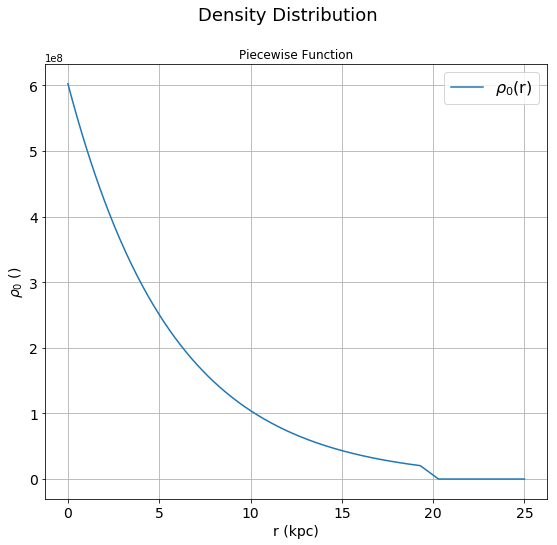

20594.48044202433
0.0


In [2]:
#density piecewise function
def rho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-((r-R)/d)), lambda r: 0]
    return np.piecewise(r, condlist, funclist)
ra = np.linspace(0, 25, 500)

#plotting piecewise function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho0(ra, R, h, d), linestyle='solid', label='$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho0(20.289, R, h, d))
print(rho0(20.291, R, h, d))

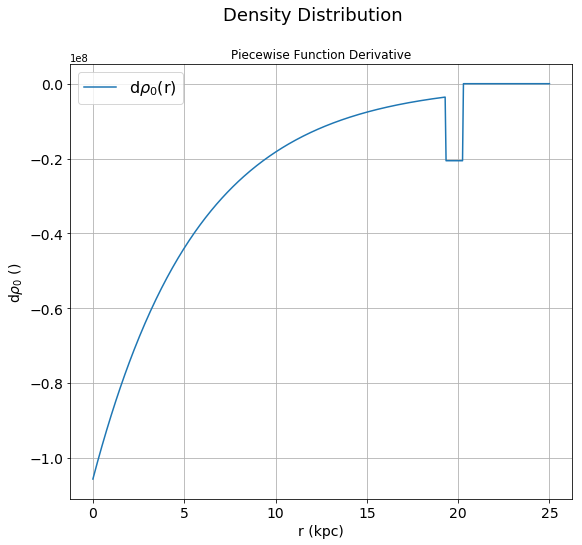

-20594480.442040045
0.0


In [3]:
#partial derivative of rho(u,xi)
def durho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

#plotting piecewise function derivative
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, durho0(ra, R, h, d), linestyle='solid', label='d$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(durho0(20.289, R, h, d))
print(durho0(20.291, R, h, d))

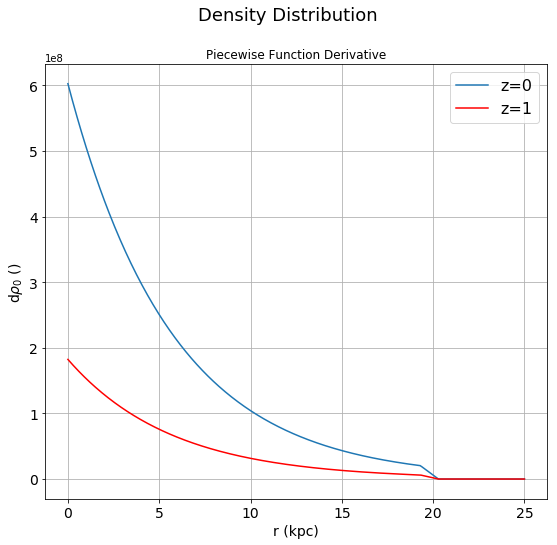

20594.48044202433
0.0
-20594480.442040045
0.0


In [4]:
#disk density distribution
rho_rz = lambda r,z: rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))
drho_rz = lambda r,z: durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

#z = np.linspace(0, 25, 500)
#print(np.shape(r3))
#print(np.shape(z3))
#print(np.shape(rho_rz(r3,z3)))

#plotting disk density distribution
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho_rz(ra,0), linestyle='solid', label='z=0')          
plt.plot(ra, rho_rz(ra,1), linestyle='solid', label='z=1', color='r')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho_rz(20.289,0))
print(rho_rz(20.291,0))
print(drho_rz(20.289,0))
print(drho_rz(20.291,0))

13477172.279234927


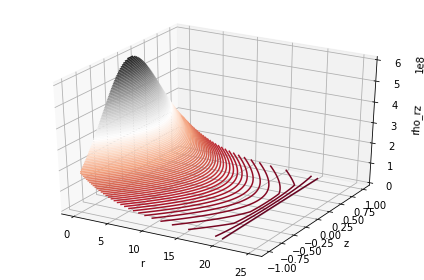

In [9]:
#plotting disk density distribution in 3D
from mpl_toolkits import mplot3d

def rho_rz2(r, z):
    return rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

za = np.linspace(-1, 1, 500)

RA, ZA = np.meshgrid(ra, za)
RZ = rho_rz2(RA, ZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RA, ZA, RZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('rho_rz');

print(rho_rz2(2,2))

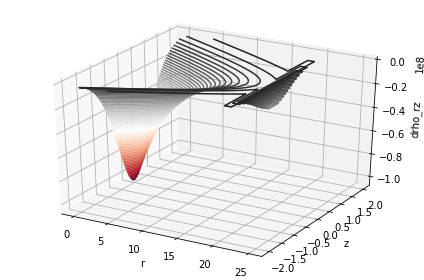

In [11]:
#plotting derivative of disk density distribution in 3D
def drho_rz2(r, z):
    return durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

zb = np.linspace(-2, 2, 500)

RB, ZB = np.meshgrid(ra, zb)
RZB = drho_rz2(RB, ZB)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RB, ZB, RZB, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('drho_rz');

In [12]:
#complete elliptic integral
K = lambda r,u,xi: ellipk(px(r,u,xi)) - ellipe(px(r,u,xi))

print(K(1,1,1))

0.35734399698214614


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in subtract


-9876768.64718937


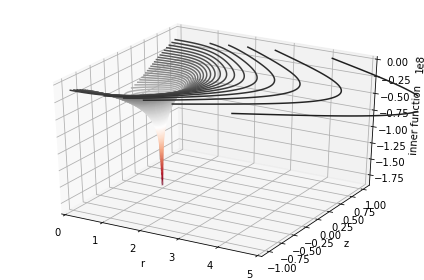

In [16]:
#inner function
#f = lambda r,u,xi: ((2*np.sqrt(u))/(np.pi*np.sqrt(r*p(x(r,u,xi)))))*K(r,u,xi)*drho_rz(u,xi)
#f = lambda r,u,xi: ((2*np.sqrt(u))/(np.pi*np.sqrt(r*p(x(r,u,xi)))))*K(r,u,xi)*drho_rz(r,z)
f = lambda r,u,z: drho_rz(r, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

#za = np.linspace(-1, 1, 500)

#plot inner function 3D
def f2(r, u, z):
    return drho_rz(r, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

RC, ZC = np.meshgrid(ra, za)
RZC = f2(RC, 1, ZC)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RC, ZC, RZC, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlim(0,5)
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('inner function');

print(f(1,1,1))

In [23]:
#integrate function
#intf = lambda xi: quad(f, 0, np.inf, args=(r,u,))
f3 = lambda z,r,u: f(r,u,z)
intf = lambda r,u: quad(f3, 0, np.inf, args=(r,u,))[0]
print(intf(1,1))

-47402068.98086086


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#integrate outer function
intf3 = lambda u,r: intf(r,u)
intintf = lambda r: quad(intf3, 0.1, 100, args=(r,))[0]
print(intintf(1))
#u = r

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


-216284411.61503264


In [28]:
#radial force function
F = lambda r: 4*np.pi*G*intintf(r)
print(F(1))

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


-11687.013320191374


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


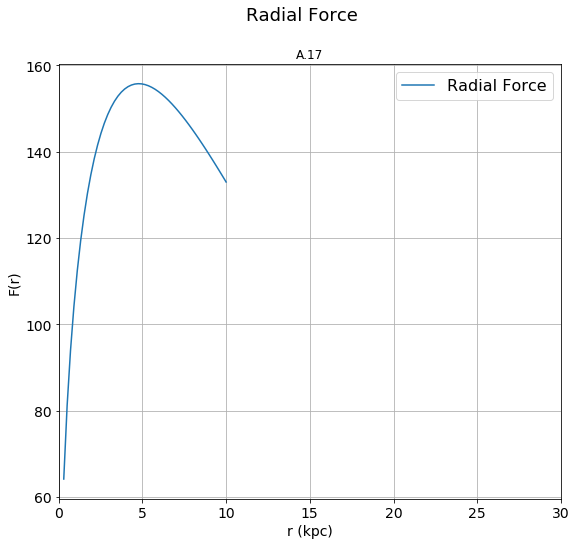

In [37]:
#plot radial force
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

rd = np.linspace(0.1, 10, num=50)
Fv = np.vectorize(F)

plt.plot(rd, np.sqrt(-rd*Fv(rd)), linestyle='solid', label='Radial Force')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Radial Force', fontsize=18)
ax.set(title='A.17')              #labeling axes
ax.set_xlim(0,30)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('F(r)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()
